In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
import datetime as dt
from zigzag_dag26 import zigzag
import talib

In [2]:
%%time
##### Chargement de la base
df = pd.read_csv('Base_Clean/EURUSDm5.csv')

##### On fixe la date en index sous forme de Timestamp
df.set_index(pd.to_datetime(df.Date),drop=True,inplace=True)

###### On drop les colonnes inutiles
df = df.drop(['Date','Total'],axis=1)

##### On enlève les jours correspondant au samedi et au dimanche
df['WE'] = np.where(((df.index.weekday == 5) | (df.index.weekday == 6)),None,df.index.weekday)
df = df.dropna()
df = df.drop(['WE'],axis=1)


CPU times: user 1.99 s, sys: 234 ms, total: 2.23 s
Wall time: 2.23 s


In [3]:
df.index[0],df.index[-1]

(Timestamp('2010-11-23 00:00:00'), Timestamp('2020-11-23 15:40:00'))

In [4]:
%%time
_year_bottom = pd.to_datetime('2018-09-14 16:00:00')
_year_top = pd.to_datetime('2020-09-14 16:00:00')

df = df[(df.index>=_year_bottom)&(df.index<=_year_top)]

df_input = df.copy()

df_bt = df.copy()

df.head()

CPU times: user 26.6 ms, sys: 27.1 ms, total: 53.7 ms
Wall time: 62.5 ms


,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close,HigMax,LowMin
Date,,,,,,,,,,,,,,
2018-09-14 16:00:00,1.16664,1.16709,1.16644,1.16693,1.16682,1.16724,1.16659,1.16704,1.166730,1.167165,1.166515,1.166985,1.16709,1.1619
2018-09-14 16:05:00,1.16693,1.16704,1.16644,1.16659,1.16704,1.16719,1.16657,1.16673,1.166985,1.167115,1.166505,1.166660,1.16704,1.1619
2018-09-14 16:10:00,1.16659,1.16667,1.16544,1.16560,1.16673,1.16682,1.16557,1.16576,1.166660,1.166745,1.165505,1.165680,1.16687,1.1619
2018-09-14 16:15:00,1.16560,1.16613,1.16556,1.16578,1.16576,1.16626,1.16571,1.16593,1.165680,1.166195,1.165635,1.165855,1.16687,1.1619
2018-09-14 16:20:00,1.16578,1.16631,1.16552,1.16612,1.16593,1.16646,1.16566,1.16627,1.165855,1.166385,1.165590,1.166195,1.16687,1.1619


In [5]:
%%time
df = df.iloc[-3900:-1600,:]


CPU times: user 383 µs, sys: 17 µs, total: 400 µs
Wall time: 387 µs


In [24]:
_deviation = 0.15
_backstep = 3
_depth = 40
_inactive = 3
df.shape

(2300, 16)

Effectué en  0 mouches
Il y a  21 signaux buy,  20 signaux sell, et  2259  signaux sans rien
CPU times: user 952 ms, sys: 26 ms, total: 978 ms
Wall time: 940 ms


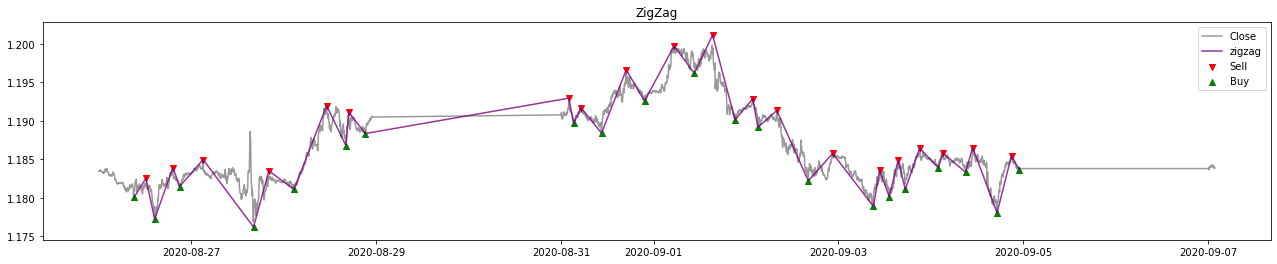

In [25]:
%%time
PEAK,VALLEY = zigzag(df,_deviation, _backstep, _depth,_inactive)
df['Peak'] = PEAK
df['Valley'] = VALLEY

CPU times: user 45.5 ms, sys: 7.32 ms, total: 52.8 ms
Wall time: 42.2 ms


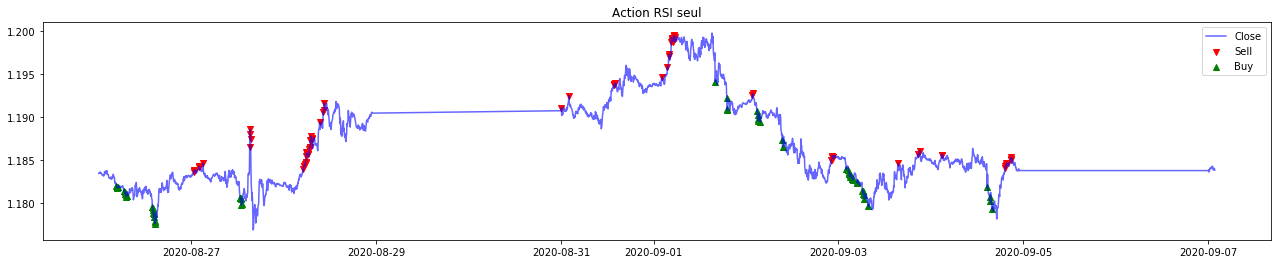

In [26]:
%%time
df['RSI'] = talib.RSI(df.Close,14)
df['RSI_buy'] = np.where(df.RSI<30,1,0)
df['RSI_sell'] = np.where(df.RSI>70,1,0)

plt.figure(figsize=(22,4))
plt.title('Action RSI seul')
plt.plot(df.Close,color='blue',alpha=0.6,label="Close")

plt.scatter(x=df[df.RSI_sell==1].index,y=df[df.RSI_sell==1].Close,color='red',marker='v',label="Sell")
plt.scatter(x=df[df.RSI_buy==1].index,y=df[df.RSI_buy==1].Close,color='green',marker='^',label="Buy")
plt.legend()

CPU times: user 49.2 ms, sys: 6.79 ms, total: 56 ms
Wall time: 41.8 ms


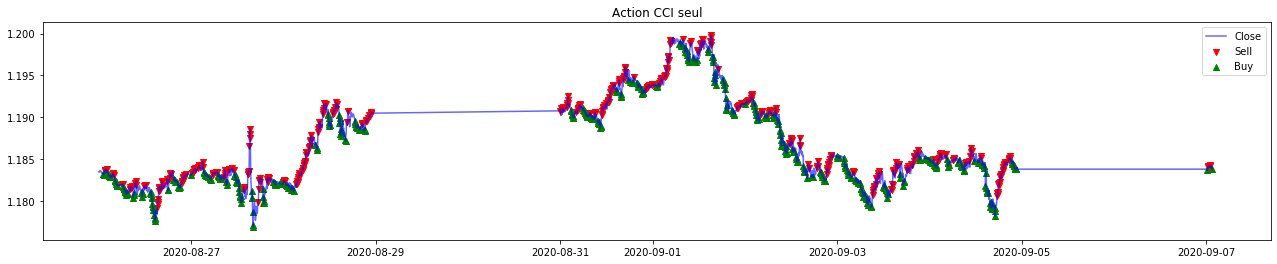

In [27]:
%%time
df['CCI'] = talib.CCI(df.High,df.Low,df.Close,14)
df['CCI_buy'] = np.where(df.CCI<-100,1,0)
df['CCI_sell'] = np.where(df.CCI>100,1,0)
plt.figure(figsize=(22,4))
plt.title('Action CCI seul')
plt.plot(df.Close,color='blue',alpha=0.6,label="Close")

plt.scatter(x=df[df.CCI_sell==1].index,y=df[df.CCI_sell==1].Close,color='red',marker='v',label="Sell")
plt.scatter(x=df[df.CCI_buy==1].index,y=df[df.CCI_buy==1].Close,color='green',marker='^',label="Buy")
plt.legend()

CPU times: user 46 ms, sys: 6.06 ms, total: 52.1 ms
Wall time: 40.3 ms


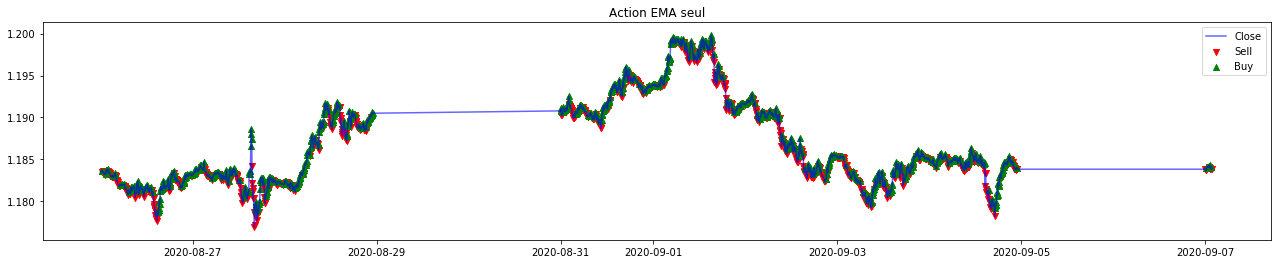

In [28]:
%%time
df['EMA'] = talib.EMA(df.Close,5)
df['EMA_buy'] = np.where(df.EMA<= df.Close,1,0)
df['EMA_sell'] = np.where(df.EMA>=df.Close,1,0)
plt.figure(figsize=(22,4))
plt.title('Action EMA seul')
plt.plot(df.Close,color='blue',alpha=0.6,label="Close")

plt.scatter(x=df[df.EMA_sell==1].index,y=df[df.EMA_sell==1].Close,color='red',marker='v',label="Sell")
plt.scatter(x=df[df.EMA_buy==1].index,y=df[df.EMA_buy==1].Close,color='green',marker='^',label="Buy")
plt.legend()

CPU times: user 43.4 ms, sys: 6.26 ms, total: 49.7 ms
Wall time: 35.3 ms


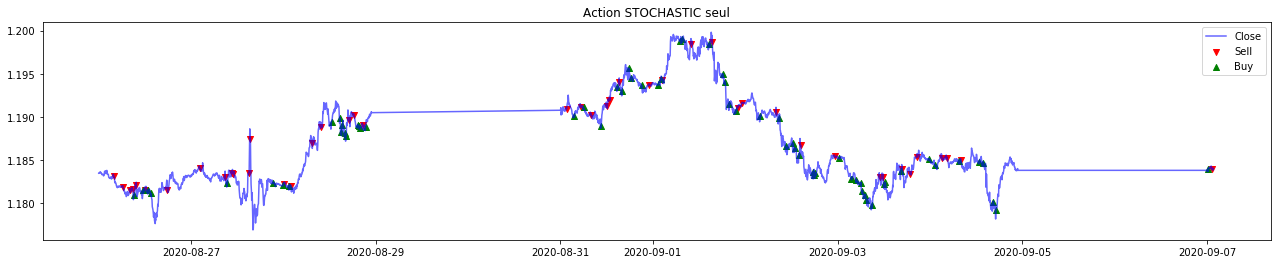

In [29]:
%%time
_slowk,_slowd = talib.STOCH(df.High,df.Low,df.Close, fastk_period=14, slowk_period=2, slowk_matype=0, slowd_period=3, slowd_matype=0)
df['STOCH_buy'] = np.where(((_slowk.shift(1)<_slowd.shift(1))&(_slowk.shift(1) < 20)&(_slowk>_slowd)&(_slowk>20)),1,0)
df['STOCH_sell'] = np.where(((_slowk.shift(1)>_slowd.shift(1))&(_slowk.shift(1) > 80)&(_slowk<_slowd)&(_slowk<80)),1,0)
plt.figure(figsize=(22,4))
plt.title('Action STOCHASTIC seul')
plt.plot(df.Close,color='blue',alpha=0.6,label="Close")

plt.scatter(x=df[df.STOCH_sell==1].index,y=df[df.STOCH_sell==1].Close,color='red',marker='v',label="Sell")
plt.scatter(x=df[df.STOCH_buy==1].index,y=df[df.STOCH_buy==1].Close,color='green',marker='^',label="Buy")
plt.legend()

CPU times: user 42.6 ms, sys: 5.6 ms, total: 48.2 ms
Wall time: 32.6 ms


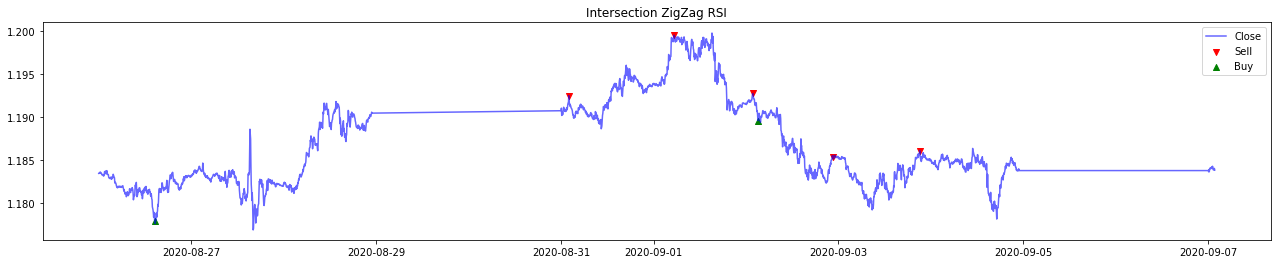

In [30]:
%%time

df['INTER_buy'] = np.where(((df.Valley==1)&(df.RSI_buy==1)),1,0)
df['INTER_sell'] = np.where(((df.Peak==1)&(df.RSI_sell==1)),1,0)
plt.figure(figsize=(22,4))
plt.title('Intersection ZigZag RSI')
plt.plot(df.Close,color='blue',alpha=0.6,label="Close")

plt.scatter(x=df[df.INTER_sell==1].index,y=df[df.INTER_sell==1].Close,color='red',marker='v',label="Sell")
plt.scatter(x=df[df.INTER_buy==1].index,y=df[df.INTER_buy==1].Close,color='green',marker='^',label="Buy")
plt.legend()

CPU times: user 40.5 ms, sys: 5.42 ms, total: 45.9 ms
Wall time: 30 ms


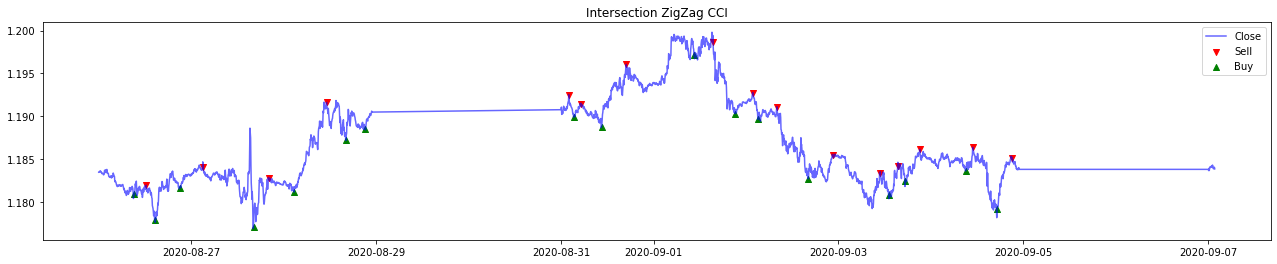

In [31]:
%%time

df['INTER_buy'] = np.where(((df.Valley==1)&(df.CCI_buy==1)),1,0)
df['INTER_sell'] = np.where(((df.Peak==1)&(df.CCI_sell==1)),1,0)
plt.figure(figsize=(22,4))
plt.title('Intersection ZigZag CCI')
plt.plot(df.Close,color='blue',alpha=0.6,label="Close")

plt.scatter(x=df[df.INTER_sell==1].index,y=df[df.INTER_sell==1].Close,color='red',marker='v',label="Sell")
plt.scatter(x=df[df.INTER_buy==1].index,y=df[df.INTER_buy==1].Close,color='green',marker='^',label="Buy")
plt.legend()

CPU times: user 42.8 ms, sys: 5.21 ms, total: 48 ms
Wall time: 38.4 ms


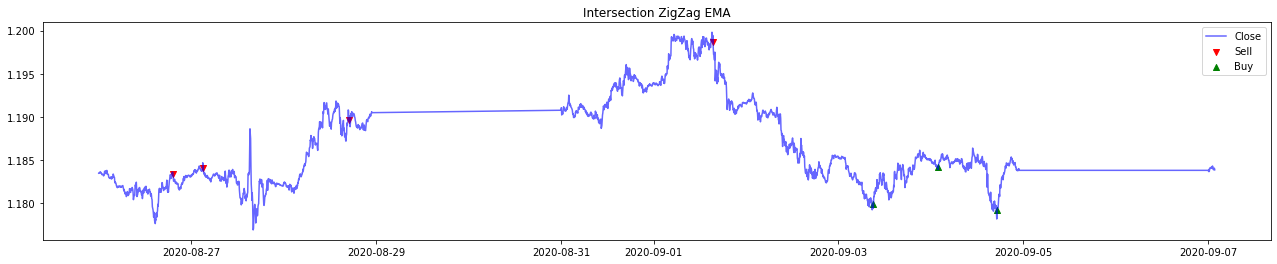

In [32]:
%%time

df['INTER_buy'] = np.where(((df.Valley==1)&(df.EMA_buy==1)),1,0)
df['INTER_sell'] = np.where(((df.Peak==1)&(df.EMA_sell==1)),1,0)
plt.figure(figsize=(22,4))
plt.title('Intersection ZigZag EMA')
plt.plot(df.Close,color='blue',alpha=0.6,label="Close")

plt.scatter(x=df[df.INTER_sell==1].index,y=df[df.INTER_sell==1].Close,color='red',marker='v',label="Sell")
plt.scatter(x=df[df.INTER_buy==1].index,y=df[df.INTER_buy==1].Close,color='green',marker='^',label="Buy")
plt.legend()

CPU times: user 41.3 ms, sys: 5.14 ms, total: 46.5 ms
Wall time: 31.6 ms


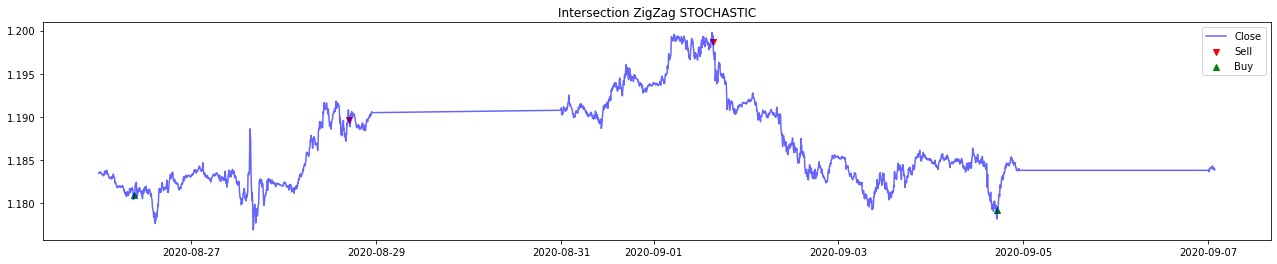

In [33]:
%%time

df['INTER_buy'] = np.where(((df.Valley==1)&(df.STOCH_buy==1)),1,0)
df['INTER_sell'] = np.where(((df.Peak==1)&(df.STOCH_sell==1)),1,0)
plt.figure(figsize=(22,4))
plt.title('Intersection ZigZag STOCHASTIC')
plt.plot(df.Close,color='blue',alpha=0.6,label="Close")

plt.scatter(x=df[df.INTER_sell==1].index,y=df[df.INTER_sell==1].Close,color='red',marker='v',label="Sell")
plt.scatter(x=df[df.INTER_buy==1].index,y=df[df.INTER_buy==1].Close,color='green',marker='^',label="Buy")
plt.legend()

CPU times: user 102 ms, sys: 7.23 ms, total: 109 ms
Wall time: 93.8 ms


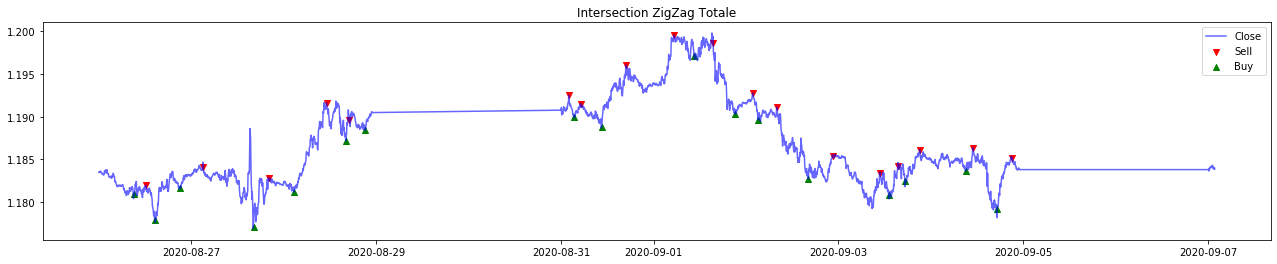

In [34]:
%%time

df['INTER_buy'] = np.where(((df.Valley==1)&((df.RSI_buy==1)|(df.CCI_buy==1)|(df.STOCH_buy==1))),1,0)
df['INTER_sell'] = np.where(((df.Peak==1)&((df.RSI_sell==1)|(df.CCI_sell==1)|(df.STOCH_sell==1))),1,0)
plt.figure(figsize=(22,4))
plt.title('Intersection ZigZag Totale')
plt.plot(df.Close,color='blue',alpha=0.6,label="Close")

plt.scatter(x=df[df.INTER_sell==1].index,y=df[df.INTER_sell==1].Close,color='red',marker='v',label="Sell")
plt.scatter(x=df[df.INTER_buy==1].index,y=df[df.INTER_buy==1].Close,color='green',marker='^',label="Buy")
plt.legend()

In [35]:
_slowk,_slowd = talib.STOCH(df_input.High,df_input.Low,df_input.Close, fastk_period=14, slowk_period=2, slowk_matype=0, slowd_period=3, slowd_matype=0)
_slowdk = (_slowk - _slowd)
df_input['Return'] = (df_input.Close - df_input.Close.shift(_backstep)) / df_input.Close.shift(_backstep)
df_input['RetHiLo'] = (df_input.High - df_input.Low.shift(_backstep)) / df_input.Low.shift(_backstep)
df_input['RetLoHi'] = (df_input.Low - df_input.High.shift(_backstep)) / df_input.High.shift(_backstep)
df_input['RSI'] = talib.RSI(df_input.Close,14)
df_input['RetRSI'] = (df_input.RSI - df_input.RSI.shift(_backstep)) / df_input.RSI.shift(_backstep)
df_input['CCI'] = talib.CCI(df_input.High,df_input.Low,df_input.Close,14)
df_input['RetCCI'] = (df_input.CCI - df_input.CCI.shift(_backstep)) / df_input.CCI.shift(_backstep)
df_input['STOCH'] = _slowdk

df_input.tail(1)

,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,...,HigMax,LowMin,Return,RetHiLo,RetLoHi,RSI,RetRSI,CCI,RetCCI,STOCH
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-14 16:00:00,1.18781,1.18836,1.1877,1.1879,1.18794,1.18847,1.18782,1.18802,1.187875,1.188415,...,1.18858,1.186,-0.000341,0.000122,-0.000875,52.554113,-0.100088,-32.198241,-1.393133,-5.395841


Effectué en  0 mouches
Il y a  108 signaux buy,  108 signaux sell, et  146057  signaux sans rien
CPU times: user 47.7 s, sys: 755 ms, total: 48.4 s
Wall time: 47.7 s


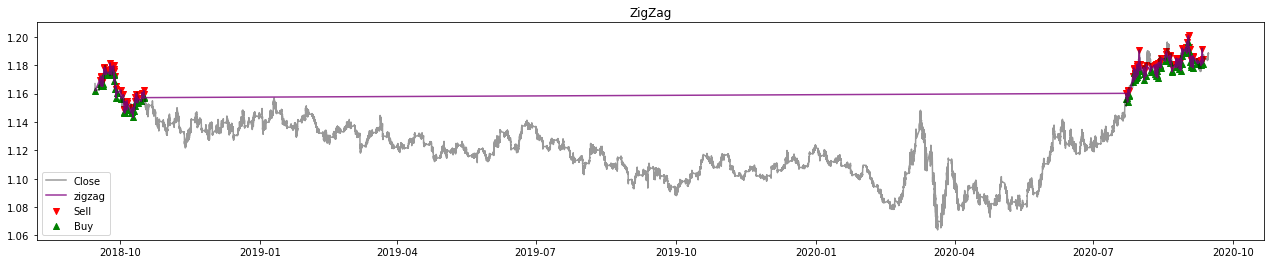

In [36]:
%%time
PEAK,VALLEY = zigzag(df_input,_deviation, _backstep, _depth, _inactive)
df_input['Peak'] = PEAK
df_input['Valley'] = VALLEY

In [37]:
df_input.index[0],df_input.index[-1]

(Timestamp('2018-09-14 16:00:00'), Timestamp('2020-09-14 16:00:00'))

In [38]:
df_input['Signal'] = np.where(df_input.Valley==1,1,np.where(df_input.Peak==1,-1,0))
df_input['Signal'] = df_input['Signal'].shift(-1).dropna()

In [39]:
X = df_input.drop(['Open','High','Low','OpenBid','HighBid','LowBid','CloseBid','OpenAsk','HighAsk','LowAsk','CloseAsk','Peak','Valley'],axis=1).dropna()

X.head(1)

,Close,HigMax,LowMin,Return,RetHiLo,RetLoHi,RSI,RetRSI,CCI,RetCCI,STOCH,Signal
Date,,,,,,,,,,,,
2018-09-14 17:25:00,1.166175,1.16641,1.1619,0.000167,0.000626,-0.00021,43.247526,0.069486,3.356136,-1.052173,2.785157,0.0


In [40]:
len(X[X.Signal==1]),len(X[X.Signal==-1]),len(X[X.Signal==0])

(108, 108, 146039)

In [41]:
%%time

##### VANILLA BT SUR SIGNALS.shift(-1) ==> Vérifier la robustesse de l'output

_size = 50000
_capital = 250000
_open_buy = 0
_open_sell = 0
_price_buy = 0
_price_sell = 0
_nb_trade = 0
_pnl = 0
_win = 0
_los = 0
PNL = []

for i in range(len(X)):
    if X.Signal[i] == 1 and _open_buy == 0 and _open_sell == 0:
        _price_buy = X.Close[i]
        _open_buy = 1

    if X.Signal[i] == 1 and _open_buy == 0 and _open_sell == 1:
        _pnl =  - _size * (X.Close[i] - _price_sell)
        _nb_trade += 1
        _open_sell = 0
        _price_sell = 0
        PNL.append(_pnl)
        if _pnl > 0:
            _win += 1
        else:
            _los += 1

    if X.Signal[i] == -1 and _open_buy == 0 and _open_sell == 0:
        _price_sell = X.Close[i]
        _open_sell = 1

    
    if X.Signal[i] == -1 and _open_sell == 0 and _open_buy == 1:
        _pnl = _size * (X.Close[i] - _price_buy)
        _nb_trade += 1
        _open_buy = 0
        _price_buy = 0
        PNL.append(_pnl)
        if _pnl > 0:
            _win += 1
        else:
            _los += 1

sum(PNL),_win,_los,_nb_trade
print('Winner Ratio :',round((1-(_los/_win))*100,2),'%')
print('Profit Ratio :',round(abs(sum(list(filter(lambda x: x > 0, PNL))) / sum(list(filter(lambda x: x <= 0, PNL))))*100,2),'%')

Winner Ratio : 100.0 %
Profit Ratio : inf %
CPU times: user 16 s, sys: 26.5 ms, total: 16 s
Wall time: 16.1 s


In [42]:
df_input.to_csv('EURUSDm5_input.csv')

In [ ]:
##########################################
######### ARTIFICIAL INTELLIGENCE ########
##########################################
import time

In [68]:
%%time
df_input = pd.read_csv('EURUSDm5_input.csv')
df_input.set_index(pd.to_datetime(df_input.Date),drop=True,inplace=True)

###### On drop les colonnes inutiles
df_input = df_input.drop(['Date','OpenBid','HighBid','LowBid','CloseBid','OpenAsk','HighAsk','LowAsk','CloseAsk','Open','High','Low','Close','RetCCI'],axis=1)
df_input = df_input.dropna()
df_input.head()

CPU times: user 610 ms, sys: 81.9 ms, total: 692 ms
Wall time: 692 ms


,HigMax,LowMin,Return,RetHiLo,RetLoHi,RSI,RetRSI,CCI,STOCH,Peak,Valley,Signal
Date,,,,,,,,,,,,
2018-09-14 17:25:00,1.16641,1.1619,0.000167,0.000626,-0.000210,43.247526,0.069486,3.356136,2.785157,0,0,0.0
2018-09-14 17:30:00,1.16641,1.1619,0.000133,0.000703,-0.000077,44.103484,0.057832,23.131488,6.758305,0,0,0.0
2018-09-14 17:35:00,1.16641,1.1619,0.000154,0.000279,-0.000484,43.345292,0.060985,-53.049142,2.749141,0,0,0.0
2018-09-14 17:40:00,1.16641,1.1619,0.000086,0.000407,-0.000390,44.876106,0.037657,6.940214,0.744559,0,0,0.0
2018-09-14 17:45:00,1.16641,1.1619,0.000043,0.000390,-0.000291,45.104303,0.022693,32.721607,3.150057,0,0,0.0


In [69]:
%%time
from multiclass_svm import modelize
from sklearn.preprocessing import MinMaxScaler
import pyttsx3
import joblib
scaler = MinMaxScaler(feature_range=(0, 1))
engine = pyttsx3.init()

x = 'EUR/USD'
TICKERS = [x]
_period = 'm5'

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 40.1 µs


In [70]:
%%time
df_input['HigMax'] = scaler.fit_transform(df_input['HigMax'].to_numpy().reshape(-1, 1))
df_input['LowMin'] = scaler.fit_transform(df_input['LowMin'].to_numpy().reshape(-1, 1))
df_input['Return'] = scaler.fit_transform(df_input['Return'].to_numpy().reshape(-1, 1))
df_input['RetHiLo'] = scaler.fit_transform(df_input['RetHiLo'].to_numpy().reshape(-1, 1))
df_input['RetLoHi'] = scaler.fit_transform(df_input['RetLoHi'].to_numpy().reshape(-1, 1))
df_input['RSI'] = scaler.fit_transform(df_input['RSI'].to_numpy().reshape(-1, 1))
df_input['RetRSI'] = scaler.fit_transform(df_input['RetRSI'].to_numpy().reshape(-1, 1))
df_input['CCI'] = scaler.fit_transform(df_input['CCI'].to_numpy().reshape(-1, 1))
#df_input['RetCCI'] = scaler.fit_transform(df_input['RetCCI'].to_numpy().reshape(-1, 1))
df_input['STOCH'] = scaler.fit_transform(df_input['STOCH'].to_numpy().reshape(-1, 1))


CPU times: user 17.1 ms, sys: 1.37 ms, total: 18.4 ms
Wall time: 17.4 ms


In [71]:
_model = 'multiclass_svm'

df = df.dropna()
_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
modelize(df_input,x,_model)
print("\n\n ===> MODELISATION terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

Début des opérations horodatée à 2020-12-02 15:37:32.361997
 Multi class Support Vector Machine pour  EUR/USD 
Modèle : multiclass_svm
COMPUTING
Signaux Counter({0.0: 146039, 1.0: 108, -1.0: 108})
 Multiclass pour  EUR/USD 

Achat - Accuracy : 99.85 %
Achat - Precision : 99.85 %
Achat - Recall : 99.85 %
Achat - F-measure: : 99.85 % 


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        76
         0.0       1.00      1.00      1.00    102228
         1.0       0.00      0.00      0.00        75

    accuracy                           1.00    102379
   macro avg       0.33      0.33      0.33    102379
weighted avg       1.00      1.00      1.00    102379

[[     0     76      0]
 [     0 102228      0]
 [     0     75      0]]


 Joblib Model  JOBLIB/multiclass_svm/SaveEURUSDm5.sav  dumped to disk 


 ===> MODELISATION terminée.
Temps d'excution du module 0:00:05.290075
